## Análise Erik

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [33]:
df = pd.read_csv("./data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [34]:
df_erik = df[['Qde Total de Faturas Inadimpletes', 'Cancelamentos Atendimento Médico', 'Problemas Abertos', 'Psicológico', 'Método de Pagamento', 'Mensagens Inbound', 'notes_count', 'Físico', 'Qde Atendimento Médico', 'id_marrital_status', 'id_org', 'start_of_service']
]

In [35]:
df_erik.shape

(1202, 12)

In [36]:
df_erik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Qde Total de Faturas Inadimpletes  252 non-null    float64
 1   Cancelamentos Atendimento Médico   1202 non-null   bool   
 2   Problemas Abertos                  610 non-null    object 
 3   Psicológico                        898 non-null    object 
 4   Método de Pagamento                252 non-null    object 
 5   Mensagens Inbound                  1091 non-null   float64
 6   notes_count                        1202 non-null   int64  
 7   Físico                             898 non-null    object 
 8   Qde Atendimento Médico             1202 non-null   bool   
 9   id_marrital_status                 1178 non-null   float64
 10  id_org                             886 non-null    object 
 11  start_of_service                   1065 non-null   objec

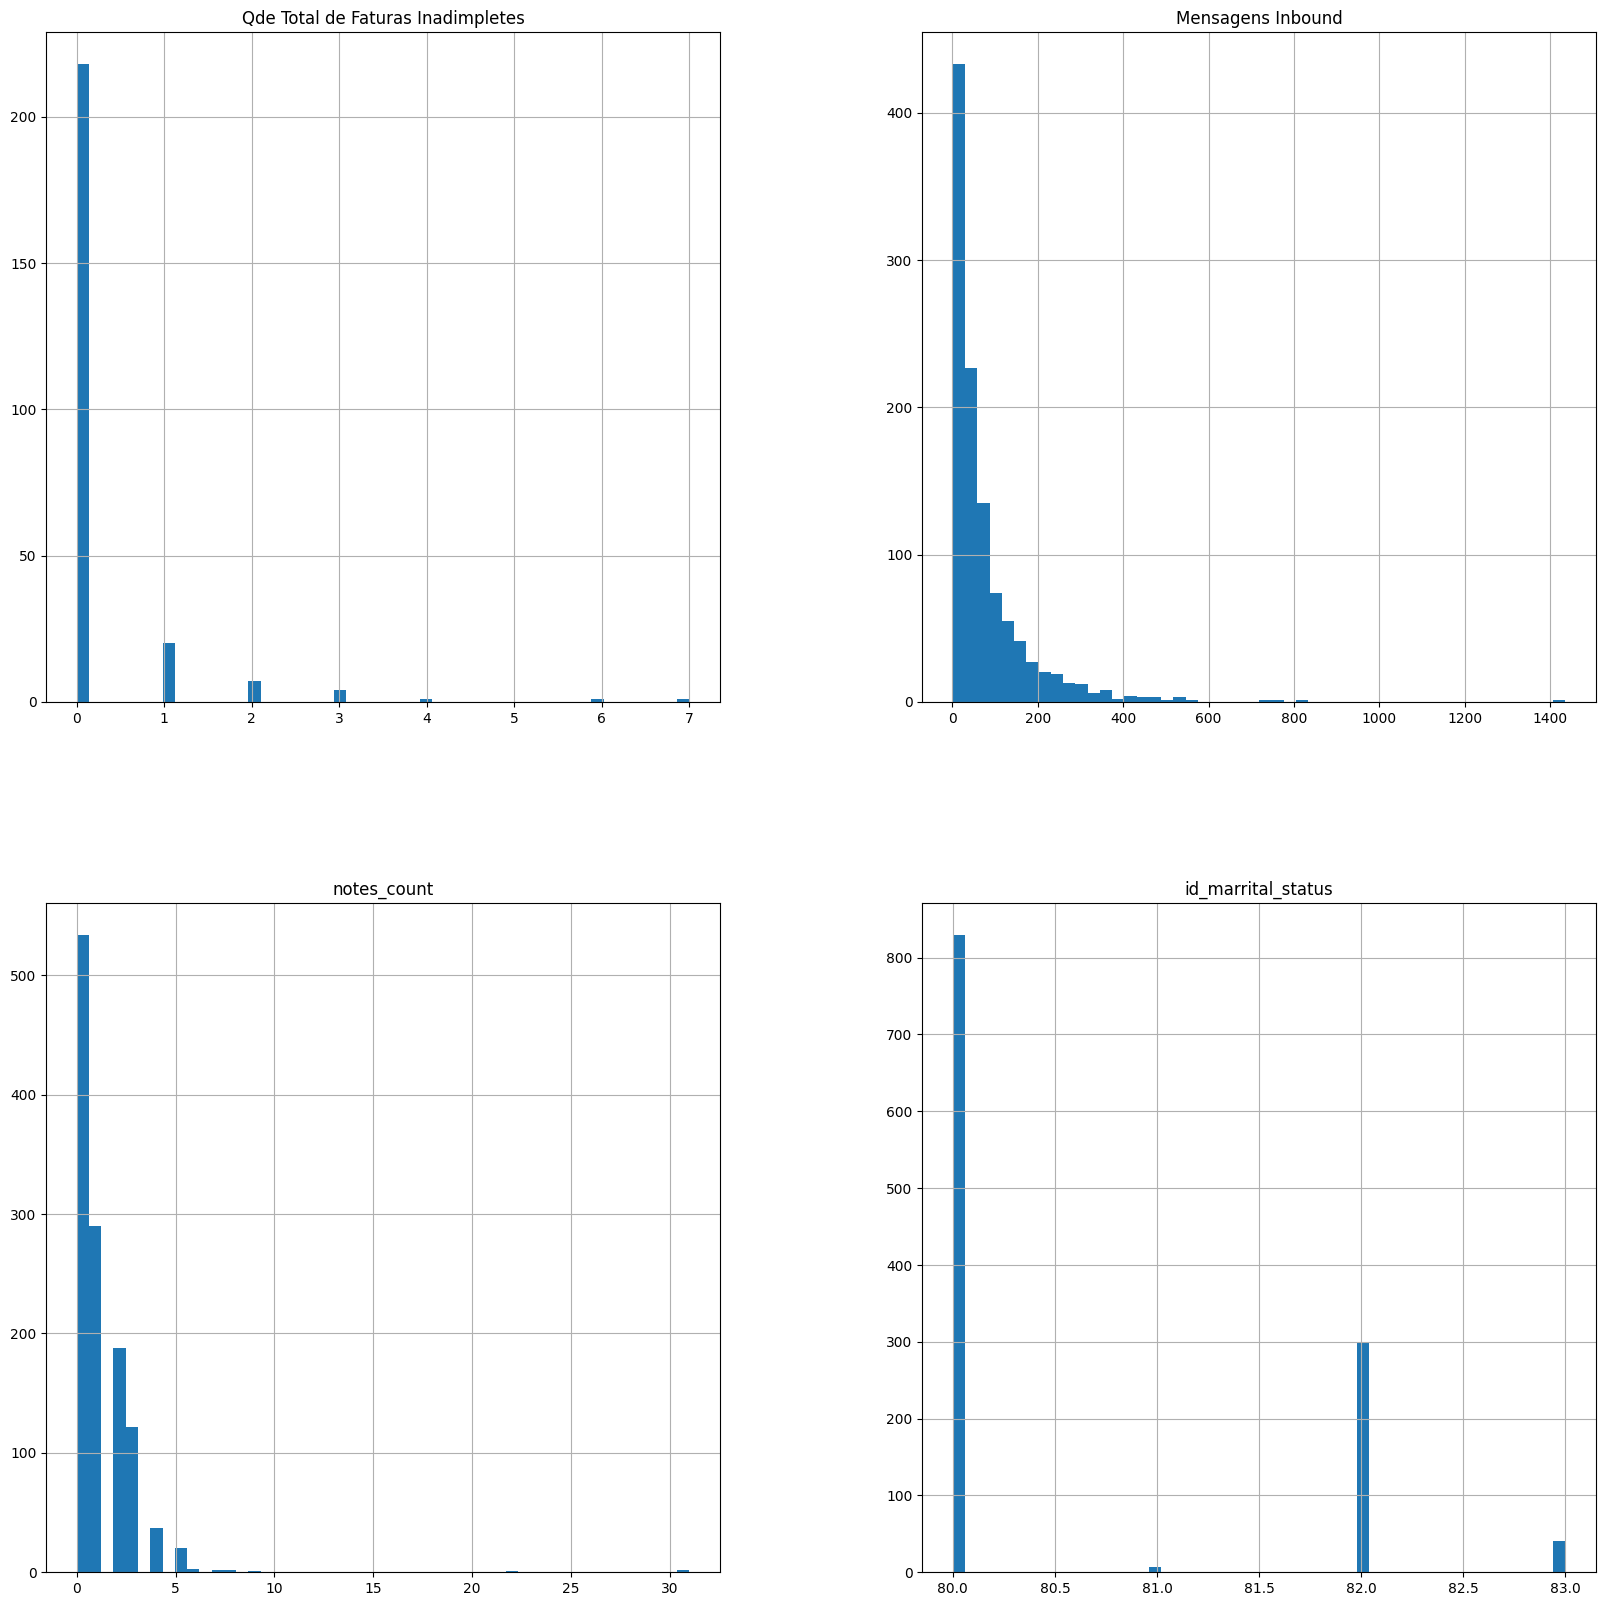

In [37]:
df_erik.hist(bins=50, figsize=(20,20))
plt.show()

In [67]:
df_erik["notes_count"].value_counts()

notes_count
0     534
1     290
2     188
3     122
4      37
5      20
6       3
31      2
8       2
7       2
22      1
9       1
Name: count, dtype: int64

In [38]:
df_erik["Qde Total de Faturas Inadimpletes"].value_counts()

Qde Total de Faturas Inadimpletes
0.0    218
1.0     20
2.0      7
3.0      4
4.0      1
6.0      1
7.0      1
Name: count, dtype: int64

In [39]:
df_erik["Cancelamentos Atendimento Médico"].value_counts()

Cancelamentos Atendimento Médico
False    1202
Name: count, dtype: int64

In [41]:
df_erik["Qde Atendimento Médico"].value_counts()

Qde Atendimento Médico
False    1202
Name: count, dtype: int64

In [45]:
colunas_bool = df_erik.select_dtypes(include='bool').columns
df_erik[colunas_bool].describe().transpose()

,count,unique,top,freq
Cancelamentos Atendimento Médico,1202,1,False,1202
Qde Atendimento Médico,1202,1,False,1202


In [47]:
colunas_object = df_erik.select_dtypes(include='object').columns
df_erik[colunas_object].describe().transpose()


,count,unique,top,freq
Problemas Abertos,610,548,ansiedade P01 (CIAP-2),11
Psicológico,898,130,4,275
Método de Pagamento,252,4,Cartão de crédito,227
Físico,898,139,"3,90",64
id_org,886,63,2457,123
start_of_service,1065,420,2023-06-12,43


In [65]:
df_erik["Problemas Abertos"].describe()

count                        610
unique                       548
top       ansiedade P01 (CIAP-2)
freq                          11
Name: Problemas Abertos, dtype: object

In [49]:
df_erik["Psicológico"].value_counts()

Psicológico
4                275
3                247
2                 58
5                 43
3,3               16
                ... 
3,7; 4,0; 3,3      1
3,2; 3,3; 3,3      1
3,7; 3,2           1
4,2; 4,7           1
3,2; 3,2           1
Name: count, Length: 130, dtype: int64

In [50]:
df_erik["Método de Pagamento"].value_counts()

Método de Pagamento
Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: count, dtype: int64

In [51]:
df_erik["Físico"].value_counts()

Físico
3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: count, Length: 139, dtype: int64

In [68]:
df_erik["id_marrital_status"].value_counts()

id_marrital_status
80.0    830
82.0    300
83.0     41
81.0      7
Name: count, dtype: int64

In [62]:
df_erik["id_org"].value_counts()

id_org
2457         123
1436         103
448           98
2458          48
1251          46
            ... 
619            1
1605           1
448; 1436      1
929; 929       1
2909           1
Name: count, Length: 63, dtype: int64

In [63]:
df_erik["start_of_service"].value_counts()

start_of_service
2023-06-12                43
2022-03-04                38
2023-06-14                25
2022-08-01                22
2023-06-13                19
                          ..
2022-07-28                 1
2022-07-27; 2022-07-27     1
2022-07-21                 1
2022-07-13                 1
2023-11-08                 1
Name: count, Length: 420, dtype: int64

**INSIGHTS**
Qtd total de faturas inadimplentes: Mudar para bool ou 1 e 0. Considerando apenas dois grupos, já teve inadimplente ou nunca teve inadimplente     
Cancelamentos Atendimento Médico: Excluir. Sem dados  
Problemas Abertos: MUITO diverso, agrupar de alguma forma?  
Qde Atendimento Médico: Excluir. Sem dados  

